# AIS Library - Simple Examples

The purpose of this notebook is to show how the developed AIS library can be utilized to compute expectations w.r.t. arbitrary target distributions.

In [1]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn
import ais_lib

## Example 1: Multivariate Gaussian Target

Let $\theta\in\mathbb{R}^d$ be a $d$-dimensional random vector on some probability space. Suppose we would like to estimate a target distribution
$$ \tilde\pi(\theta) \propto \mathcal{N}(\theta; \mu_\pi, \Sigma_\pi)$$
where $\mu\in\mathbb{R}^d$ is the target mean vector and $\Sigma_\pi\in\mathbb{R}^{d\times d}$ is the target covariance matrix. Our specific goal is to estimate the normalizing constant $Z_\pi=\int_{-\infty}^\infty \tilde\pi(\theta)$ and the mean vector $\mu_\pi=\mathbb{E}_\pi[\theta]$. 

Let us set the parameters of the target:

In [2]:
# Set parameters of the target distribution
d_theta = 2                    # dimension 
Z_pi = 1e-3                    # normalizing constant  
mu_pi = np.zeros(d_theta)      # target mean
sigma_pi = 0.1*np.eye(d_theta) # target covariance matrix 

# Create function handle
target_1 = lambda theta: np.log(Z_pi)+mvn.logpdf(theta, mu_pi, sigma_pi)

We can visualize the target distribution using a contour plot.

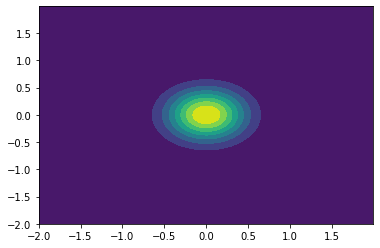

In [3]:
def function_contour(func_eval, xmin=-2, xmax=2, ymin=-2, ymax=2, delta=0.01):
    x,y = np.arange(xmin, xmax, delta),np.arange(ymin, ymax, delta)
    X,Y = np.meshgrid(x,y)
    # Reshape the X,Y axes
    Xtemp = np.reshape(X,[np.prod(X.shape),1])
    Ytemp = np.reshape(Y,[np.prod(Y.shape),1])
    # Evaluate target and reshape
    Ztemp = func_eval(np.array([Xtemp,Ytemp]).T)
    Z = np.reshape(np.asmatrix(Ztemp),[X.shape[0],X.shape[1]])
    # Plot contour
    fig = plt.contourf(X,Y,Z)
    return fig

# Define the actual target
temp_target = lambda x: np.exp(target_1(x))
fig1 = function_contour(temp_target)

In [4]:
# Run PMC 
theta, log_w = ais_lib.pmc(target_1, d_theta)

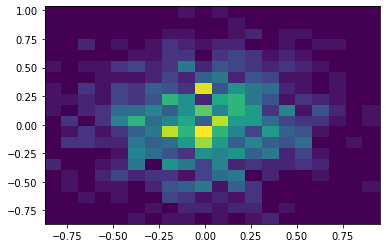

In [9]:
# Convert log weights to standard weights and normalize
w = np.exp(log_w-np.max(log_w))
w = w/np.sum(w)
# Sampling importance resampling (SIR) to get approximate posterior samples 
idx = np.random.choice(theta.shape[0], 1000, replace=True, p=w)
post_samples = theta[idx, :]
# Plot the approximated target using a weighted histogram
fig2 = plt.hist2d(post_samples[:,0], post_samples[:,1], bins=20)